# Some examples copied and pasted from my thesis (with a very simple and lightweight simulation)

### Basic stuff needed for working

In [6]:
import sys
from pathlib import Path

# Get the parent directory
parent_dir = Path().resolve().parent
# print(parent_dir)

# Add the parent directory to the system path
sys.path.append(str(parent_dir))
# print(sys.path)

In [11]:
%reload_ext autoreload
%autoreload 2
from simulation_class import Simulation, test
from make_fig_spikes import make_fig_spikes2

#! this is just for this example, you have to indicate where the files of your simulation are
files_dir = r'../' 
simulation_name = r'example_simulation'
save_dir = r'./plots'

#! this is just for how I named my directories and my simulations (for example, I fixed alpha at 0.5 in this particular case)
def spike_file_path(sigma, delta, range, P=20) -> str:
    last_bits = fr'P-{P}--range-{range}/spikes3-{sigma}-{delta}-0.5.dat'
    return r'../example_simulation/' + last_bits

def spike_file_path_strings(sigma, delta, range, P=20) -> str:
    last_bits = fr'P-{P}--range-{range}/spikes3-' + sigma + '-' + delta + '-0.5.dat'
    return r'/../example_simulation/' + last_bits

In [3]:
# test()

---
### Create the simulation object
And also do the interactive plot

In [8]:
aa = Simulation(files_dir=files_dir, simulation_name=simulation_name)

aa.slider_image()

HTML(value='<h3>example_simulation</h3>')

SelectionSlider(description='Pattern:', options=(2, 10, 20), style=SliderStyle(description_width='initial'), v…

SelectionSlider(description='Range:', options=(1.0, 2.0, 2.5), style=SliderStyle(description_width='initial'),…

IntSlider(value=1, description='Line:', max=30, min=1, style=SliderStyle(description_width='initial'))

Output()

Get the data of the simulation

In [10]:
print(aa.sigmas)
print(aa.deltas)
print(aa.int_n_patterns)
print(aa.float_mixing_ranges)

[1.0, 5.5, 10.0]
[0, 1, 2]
[2, 10, 20]
[1.0, 2.0, 2.5]


Plotting spike trains and customizing them or saving them to files (create the directory first)

read ../example_simulation/P-20--range-2.0/spikes3-5.5-2-0.5.dat
475 498


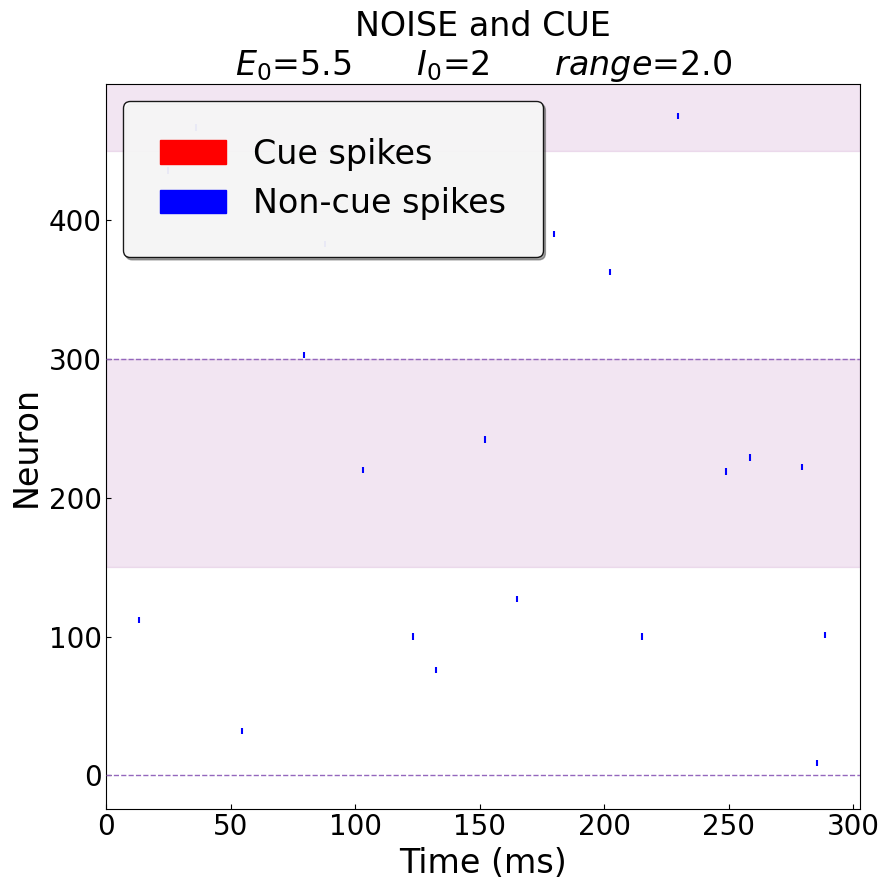

In [15]:
sigma, delta, mixing_range = 5.5, 2, 2.0


file = spike_file_path(sigma=sigma, delta=delta, range=mixing_range)
title = f'NOISE and CUE\n$E_0$={sigma}      $I_0$={delta}      $range$={mixing_range}'

import matplotlib.pyplot as plt
import matplotlib.patches as patches

# rect = patches.Rectangle(
#     (6, 2600),  # (x, y) position of the bottom-left corner
#     500,        # width
#     500,       # height
#     linewidth=6,  # Thickness of the edge
#     edgecolor='orange',  # Color of the edge
#     facecolor='none',    # Transparent fill
#     alpha=0.8            # Transparency of the edge
# )

fig, ax = plt.subplots(figsize=(9, 9))
make_fig_spikes2(spike_file=file, title=False, ax=ax, sizes=[20,200], legend=True, stripes=True, pattern=18, alpha=1)
# ax.axhspan(2600, 3100, color='orange', alpha=0.1)
# ax.add_patch(rect)
# ax.set_xlim()
# ax.set_ylim(300,1000)
# ax.set_ylim(-100,3700)
# ax.axvline(300, color="orange", lw=6, zorder=4)

ax.set_xlabel("Time (ms)", fontsize=24)
# ax.set_ylabel("", fontsize=24)
ax.set_ylabel("Neuron", fontsize=24)
# ax.set_yticks(range(0, 6000 + 1, 600))
ax.set_title(title, fontsize=24)
ax.tick_params(axis="both", which="major", labelsize=20, direction="in")
ax.set_aspect(aspect="auto")


import os
format = 'png'
# filename = rf'raster_E0_{sigma}_I0_{delta}_range{mixing_range}_low rate' + f'.{format}'
filename = rf'raster_E0_{sigma}_I0_{delta}_range{mixing_range}_ingrandita' + f'.{format}'
saveto = os.path.join(save_dir, filename)

fig.tight_layout()
# fig.savefig(saveto, format=format)

Access particular values of some variable:

In [ ]:
bb = aa.pivot_df(what='window pattern 0', n_patterns=2, mixing_range=2.0, line=1)
bb.loc[2, 5.5] #accedi dando delta e poi sigma

25

Create more complicated plots using the single plot functions for each matplotlib axis

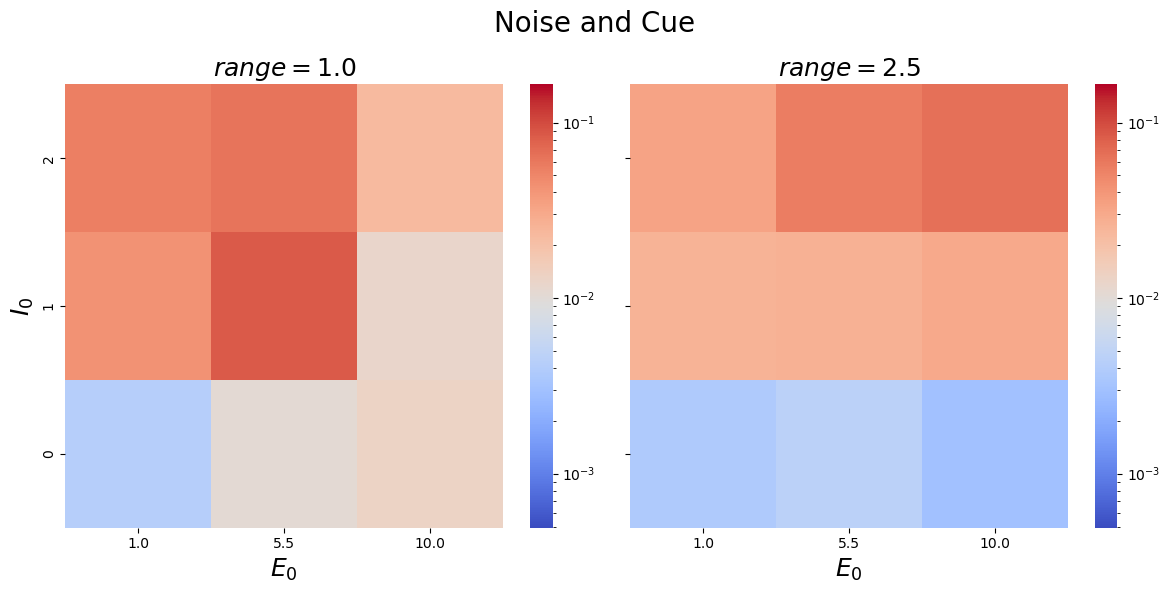

In [23]:
range1, range2 = 1.0, 2.5

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12,6))
aa.plot_fluctuations(n_patterns=20, mixing_range=range1, ax=ax[0])
aa.plot_fluctuations(n_patterns=20, mixing_range=range2, ax=ax[1])

ax[0].set_xlabel("$E_0$", fontsize=18)
ax[0].set_ylabel("$I_0$", fontsize=18)
ax[1].set_xlabel("$E_0$", fontsize=18)
ax[1].set_ylabel("", fontsize=18)
# ax.set_yticks(range(0, 3600 + 1, 300))
ax[0].set_title(f"$range={range1}$", fontsize=18)
ax[1].set_title(f"$range={range2}$", fontsize=18)
# ax.tick_params(axis="both", which="major", labelsize=20)
# fig.set_aspect(aspect="auto")

import os
format = 'png'
dpi = 300
filename = rf'fluctuations_ranges_{range1}_{range2}_noisecue' + f'.{format}'
saveto = os.path.join(save_dir, filename)

fig.suptitle(f"Noise and Cue", fontsize=20)
fig.tight_layout()
# fig.savefig(saveto, format=format, dpi=dpi)
# print(f"saved to {saveto}")

fig.show()

saved to /home/apicella/Dropbox/tesi/code/ThesisPlots/Images/NOISE_and_CUE/overlap_pattern0_higher_ranges_NOISE_and_CUE.png


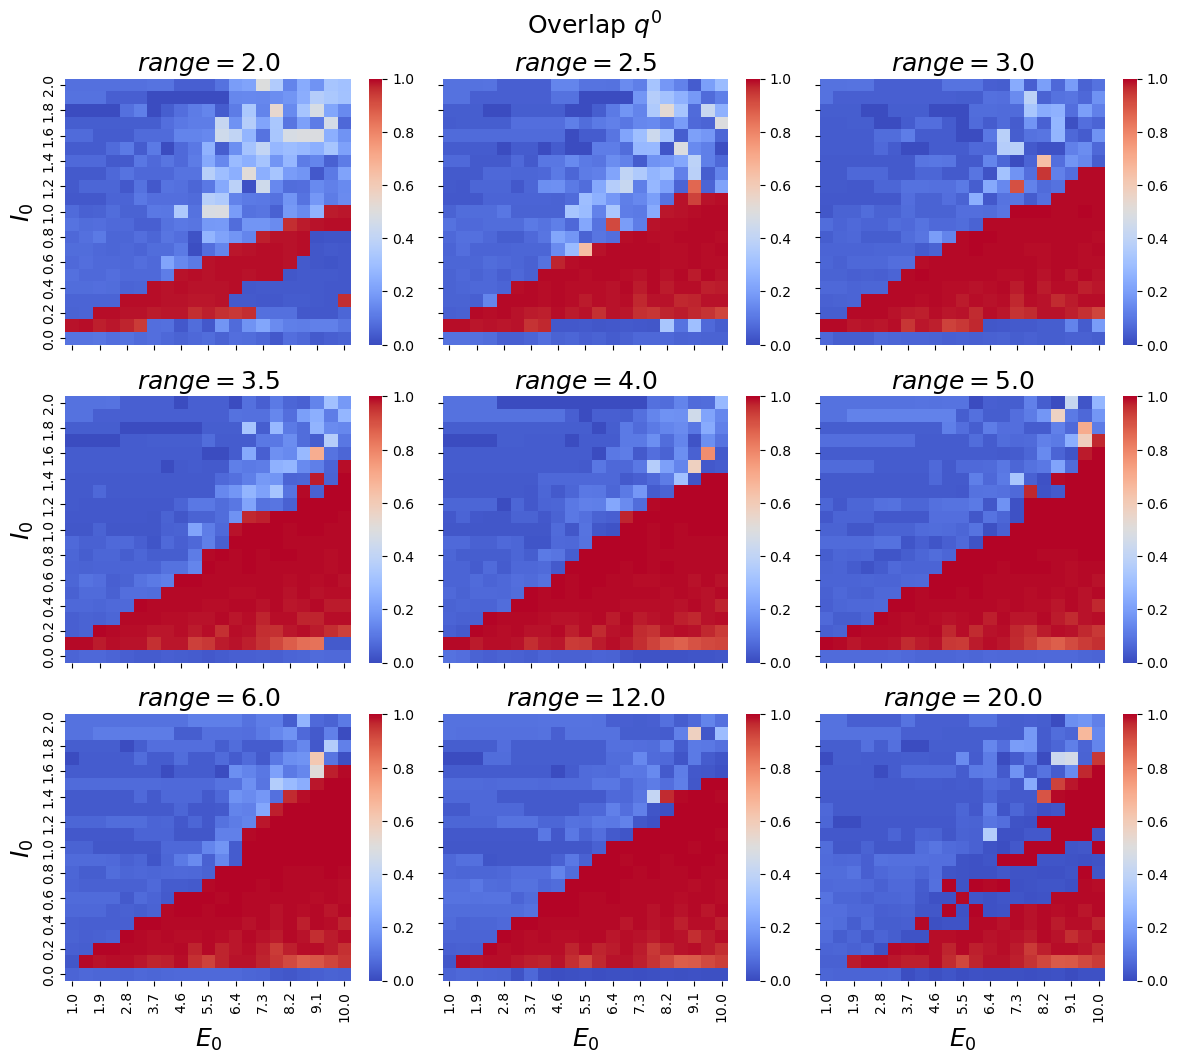

In [ ]:
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(12,10.8))
# mixing_ranges = [[2.0,2.5,3.0],[3.5,4.0,5.0],[6.0,12.0,20.0]]
# for i in range(3):
#     for j in range(3):
#         aa.plot_overlap_pattern_0(n_patterns=20, mixing_range=mixing_ranges[i][j], ax=ax[i][j])
#         ax[i][j].set_ylabel("", fontsize=18)
#         ax[i][j].set_xlabel("", fontsize=18)
#         ax[i][j].set_title(f"$range={mixing_ranges[i][j]}$", fontsize=18)

# for i in range(3):
#     ax[2][i].set_xlabel("$E_0$", fontsize=18)
#     ax[i][0].set_ylabel("$I_0$", fontsize=18)
# # ax.tick_params(axis="both", which="major", labelsize=20)
# # fig.set_aspect(aspect="auto")

# import os
# format = 'png'
# dpi = 600
# filename = rf'overlap_pattern0_higher_ranges_NOISE_and_CUE' + f'.{format}'
# saveto = os.path.join(save_dir, filename)

# fig.suptitle(f"Overlap $q^0$", fontsize=18)
# fig.tight_layout()
# # fig.savefig(saveto, format=format, dpi=dpi)
# print(f"saved to {saveto}")

# fig.show()

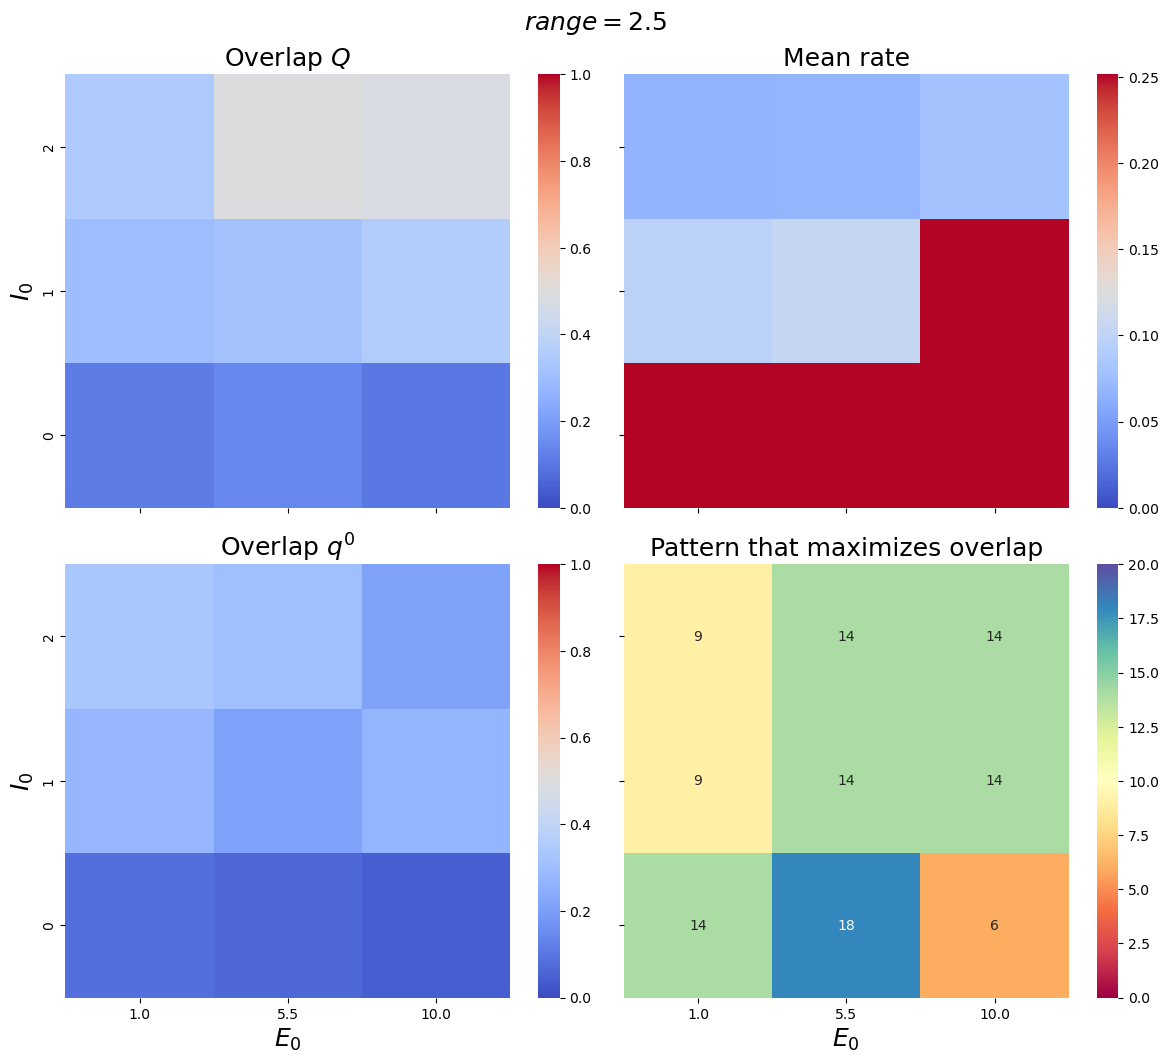

In [24]:
mixing_range= 2.5

import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12,10.8))
aa.plot_overlap(n_patterns=20, mixing_range=mixing_range, ax=ax[0,0])
aa.plot_rate(n_patterns=20, mixing_range=mixing_range, ax=ax[0,1])
aa.plot_overlap_pattern_0(n_patterns=20, mixing_range=mixing_range, ax=ax[1,0])
aa.plot_which_max(n_patterns=20, mixing_range=mixing_range, ax=ax[1,1])

ax[0,0].set_xlabel("", fontsize=18)
ax[0,0].set_ylabel("$I_0$", fontsize=18)
ax[0,1].set_xlabel("", fontsize=18)
ax[0,1].set_ylabel("", fontsize=18)
ax[1,0].set_xlabel("$E_0$", fontsize=18)
ax[1,0].set_ylabel("$I_0$", fontsize=18)
ax[1,1].set_xlabel("$E_0$", fontsize=18)
ax[1,1].set_ylabel("", fontsize=18)
# ax.set_yticks(range(0, 3600 + 1, 300))
ax[0,0].set_title(f"Overlap $Q$", fontsize=18)
ax[0,1].set_title(f"Mean rate", fontsize=18)
ax[1,0].set_title(f"Overlap $q^0$", fontsize=18)
ax[1,1].set_title(f"Pattern that maximizes overlap", fontsize=18)
# ax.tick_params(axis="both", which="major", labelsize=20)
# fig.set_aspect(aspect="auto")

import os
format = 'png'
dpi = 600
filename = rf'overlap_rate_overlap0_whichmax_range{mixing_range}' + f'.{format}'
saveto = os.path.join(save_dir, filename)

fig.suptitle(f"$range={mixing_range}$", fontsize=18)
fig.tight_layout()
# fig.savefig(saveto, format=format, dpi=dpi)
# print(f"saved to {saveto}")

fig.show()

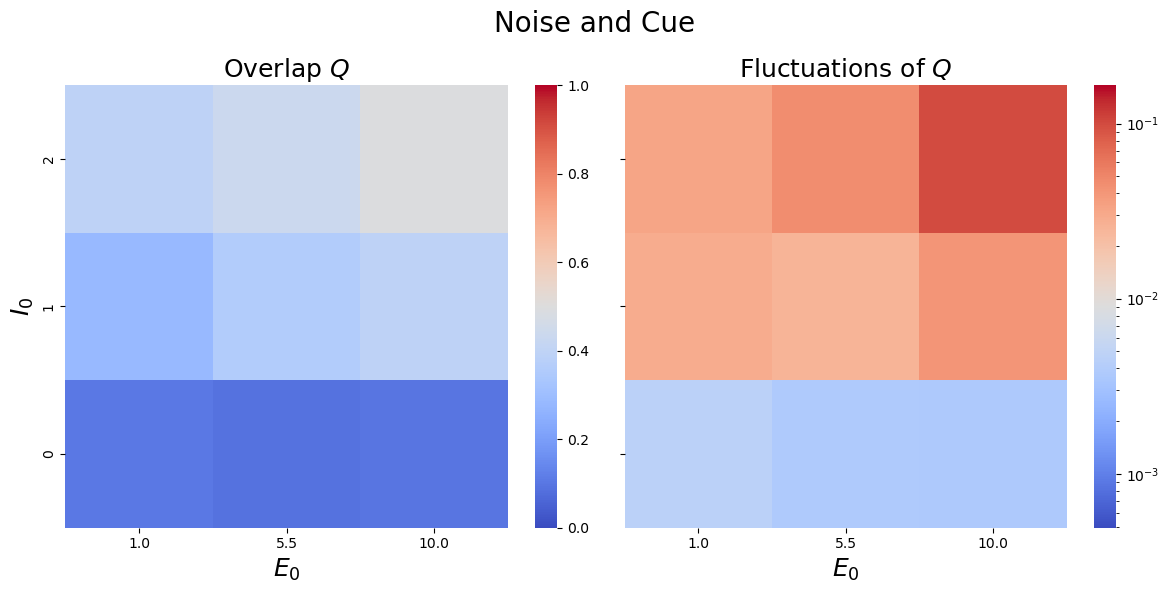

In [25]:
mixing_range= 2.0

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12,6))
aa.plot_overlap(n_patterns=20, mixing_range=mixing_range, ax=ax[0])
aa.plot_fluctuations(n_patterns=20, mixing_range=mixing_range, ax=ax[1])

ax[0].set_xlabel("$E_0$", fontsize=18)
ax[0].set_ylabel("$I_0$", fontsize=18)
ax[1].set_xlabel("$E_0$", fontsize=18)
ax[1].set_ylabel("", fontsize=18)
# ax.set_yticks(range(0, 3600 + 1, 300))
ax[0].set_title(f"Overlap $Q$", fontsize=18)
ax[1].set_title(f"Fluctuations of $Q$", fontsize=18)
# ax.tick_params(axis="both", which="major", labelsize=20)
# fig.set_aspect(aspect="auto")

import os
format = 'png'
dpi = 600
filename = rf'overlap_fluc_range{mixing_range}_noise_cue' + f'.{format}'
saveto = os.path.join(save_dir, filename)

fig.suptitle(f"Noise and Cue", fontsize=20)
fig.tight_layout()
# fig.savefig(saveto, format=format, dpi=dpi)
# print(f"saved to {saveto}")

fig.show()

saved to ./plots/overlap_range2.5.png


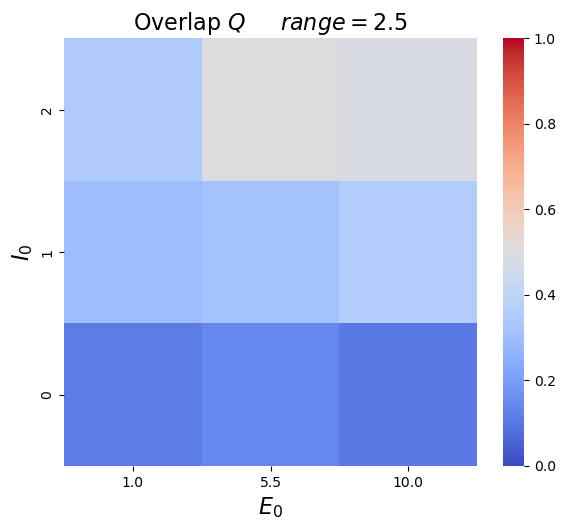

In [ ]:
mixing_range= 2.5

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,5.4))
aa.plot_overlap(n_patterns=20, mixing_range=mixing_range, ax=ax)

ax.set_xlabel("$E_0$", fontsize=16)
ax.set_ylabel("$I_0$", fontsize=16)
# ax.set_yticks(range(0, 3600 + 1, 300))
ax.set_title(f"Overlap $Q$     $range={mixing_range}$", fontsize=16)
# ax.tick_params(axis="both", which="major", labelsize=20)
ax.set_aspect(aspect="auto")

import os
format = 'png'
dpi = 600
filename = rf'overlap_range{mixing_range}' + f'.{format}'
saveto = os.path.join(save_dir, filename)

fig.tight_layout()
# fig.savefig(saveto, format=format, dpi=dpi)
# print(f"saved to {saveto}")

fig.show()


This I used to visualize where the phase transition became second order

/tmp/ipykernel_98548/2968828035.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('viridis')  # Replace 'viridis' with other options if desired


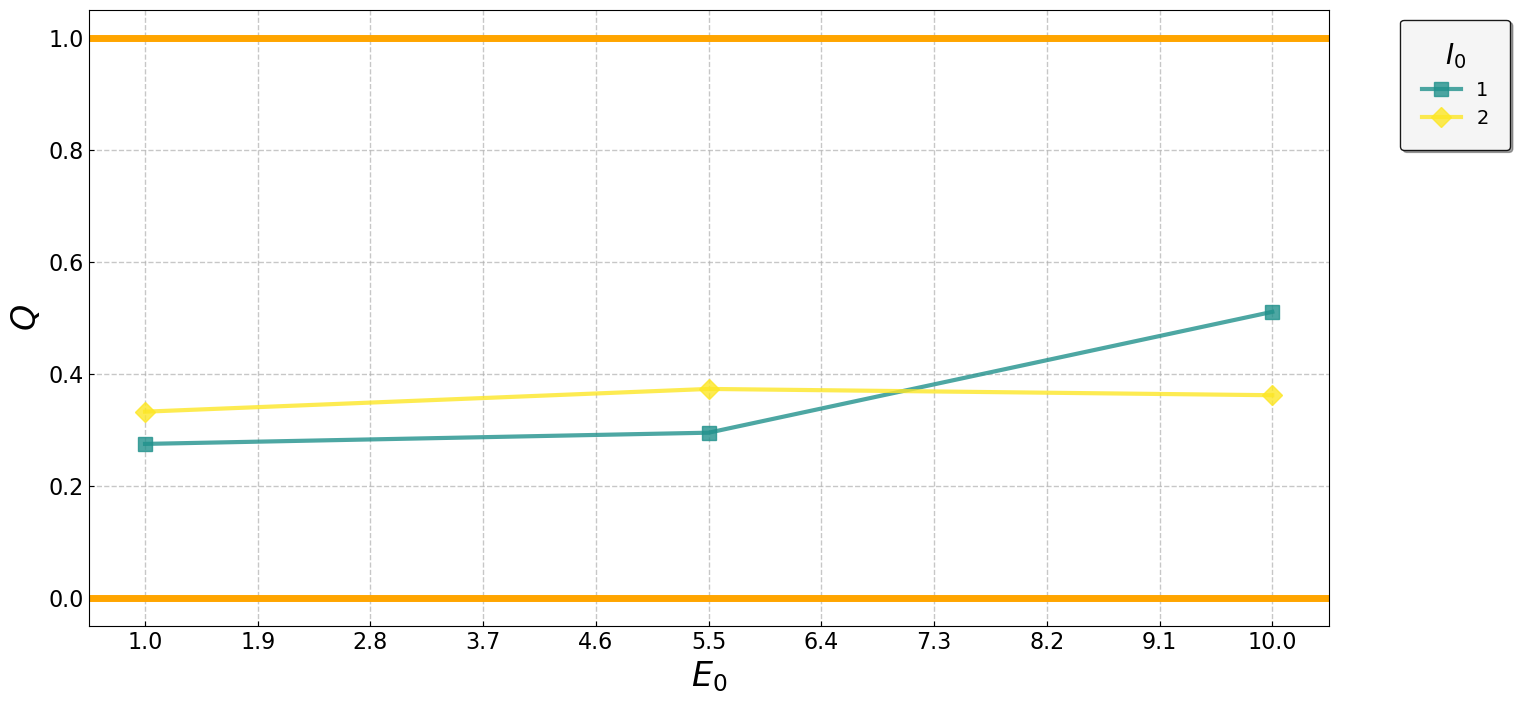

In [28]:
bb = aa.pivot_df(what='max overlap', n_patterns=10, mixing_range=2, line=1)
# bb.index
# for x in bb.index:
#     print(bb.loc[x])
# bb.loc[1.0]

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

colormap = cm.get_cmap('viridis')  # Replace 'viridis' with other options if desired
norm = plt.Normalize(vmin=0, vmax=len(bb.index) - 1)
markers = ['o', 's', 'D', '^', 'v', '<', '>', '*', 'P', 'X']

fig, ax = plt.subplots(figsize=(16,8))
for i, delta in enumerate(bb.index):
    # if (delta*10)%2 != 0:
    if delta != 0:
        data = bb.loc[delta]
        color = colormap(norm(i))
        marker = markers[i % len(markers)]
        ax.plot(data.index, data.values, marker=marker, ms=10, alpha=0.8, label=f'{delta}', color=color, lw=3)
ax.axhline(0, color='orange', lw=5)
ax.axhline(1, color='orange', lw=5)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="$I_0$", fontsize=14, title_fontsize=20,
          frameon=True,  # Add a frame around the legend
          shadow=True,   # Add a shadow for depth
          fancybox=True, # Rounded corners
          framealpha=0.9,  # Transparency of the frame
          edgecolor="black",  # Border color
          borderpad=1.1)
ax.grid(linestyle='--', alpha=0.7, linewidth=1)
ax.set_xticks(np.linspace(1,10,num=11))
ax.tick_params(axis="both", labelsize=16, direction="in")
ax.set_xlabel("$E_0$", fontsize=24)
ax.set_ylabel("$Q$", fontsize=24)
fig.show()